In [1]:
from aggregate_statistics import make_rosette_images, germ_band_length
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
from aggregate_statistics import make_rosette_images, germ_band_length
with h5py.File("runs/finale.hdf5", "r") as f:
    attrs = dict(f.attrs)
    poss = np.array(f["x"])
    cell_properties = np.array(f["properties"][0])
    p = np.array(f["p"])
    q = np.array(f["q"])

In [8]:
ints = germ_band_length(poss, cell_properties, 2.5, 50, scaled = True)

# plt.plot(ints)

5000 points in germ band
[100. 100. 100.] max
[0. 0. 0.] min
5000 points in germ band
[100. 100. 100.] max
[0. 0. 0.] min
5000 points in germ band
[100. 100. 100.] max
[0. 0. 0.] min
5000 points in germ band
[100. 100. 100.] max
[0. 0. 0.] min
5000 points in germ band
[100. 100. 100.] max
[0. 0. 0.] min
5000 points in germ band
[100. 100. 100.] max
[0. 0. 0.] min
5000 points in germ band
[100. 100. 100.] max
[0. 0. 0.] min
5000 points in germ band
[100. 100. 100.] max
[0. 0. 0.] min
5000 points in germ band
[100. 100. 100.] max
[0. 0. 0.] min
5000 points in germ band
[100. 100. 100.] max
[0. 0. 0.] min
5000 points in germ band
[100. 100. 100.] max
[0. 0. 0.] min
5000 points in germ band
[100. 100. 100.] max
[0. 0. 0.] min
5000 points in germ band
[100. 100. 100.] max
[0. 0. 0.] min
5000 points in germ band
[100. 100. 100.] max
[0. 0. 0.] min
5000 points in germ band
[100. 100. 100.] max
[0. 0. 0.] min
5000 points in germ band
[100. 100. 100.] max
[0. 0. 0.] min
5000 points in germ band

In [9]:
# find sizes of largest cluster of 1s in ints
def largest_cluster_size(arr):
    arr = np.array(arr)
    
    # Handle the periodic boundary condition by concatenating the list to itself
    arr_periodic = np.concatenate((arr, arr))
    
    # Find clusters using the same logic as before
    clusters = np.diff(np.concatenate(([0], arr_periodic, [0])))
    ones_clusters = np.where(clusters == -1)[0] - np.where(clusters == 1)[0]
    
    # Max cluster size should be limited by the length of the original array
    return min(ones_clusters.max() if ones_clusters.size > 0 else 0, len(arr))


largest_clusters = [largest_cluster_size(ints[i]) for i in range(len(ints))]


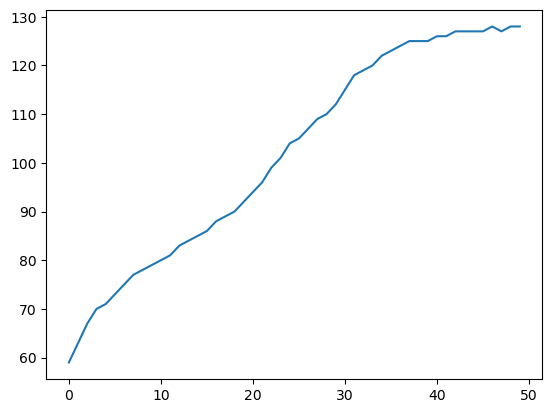

In [13]:
diffs = np.diff(largest_clusters)
plt.plot(largest_clusters)


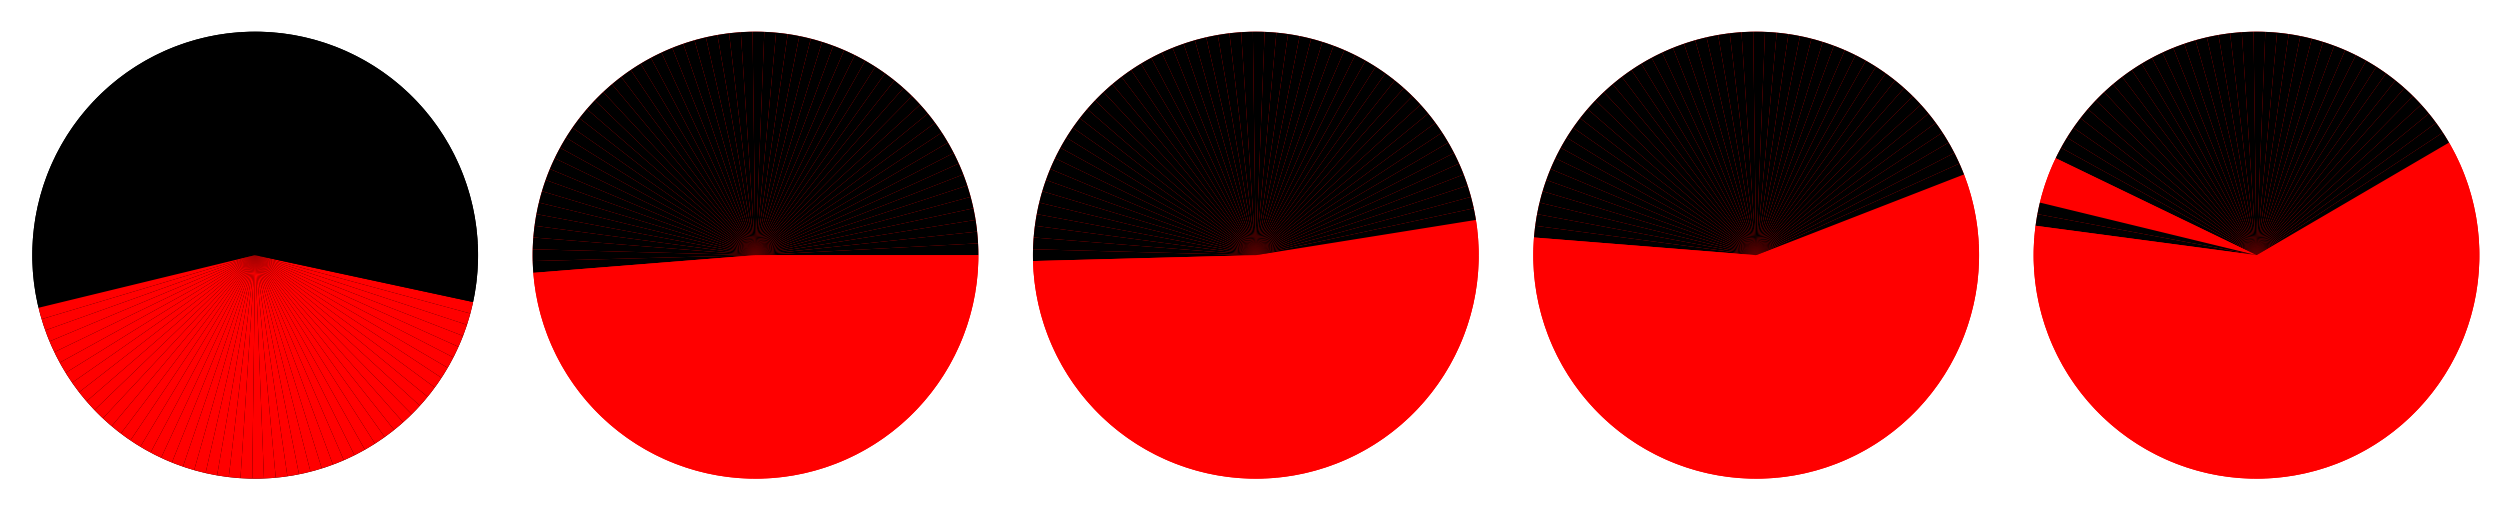

In [7]:
from matplotlib.patches import Arc, Wedge
fig, axs = plt.subplots( 1,ints.shape[0], figsize = ( 5*ints.shape[0], 5), sharey = True, sharex = True, constrained_layout = True)

xxx = np.linspace(0, 360, ints[0].shape[0])
for i in range(ints.shape[0]):
    # plt.plot(x, ints[i], color = "black", alpha = (i+1)/(ints.shape[0]+1), )
    for iii in range(ints[i].shape[0]):
        hatch = None
        fc = "black"
        if ints[i][iii]:
            hatch = None
            fc = "red"
        low = xxx[iii-1]
        high = xxx[iii]
        arc = Wedge((0, 0), 1, theta1=xxx[iii-1], theta2=xxx[iii], lw = 1, alpha = 1., hatch = hatch, ec = None, fc = fc)
        
        axs[i].add_patch(arc)
        
        axs[i].set_xlim(-1.1, 1.1)
        axs[i].set_ylim(-1.1, 1.1)

        # make 2x1 elongated
        axs[i].axis("off")

    
plt.show()

counts
(600, 5000)
per cell
(5000,)
per time step
(600,)


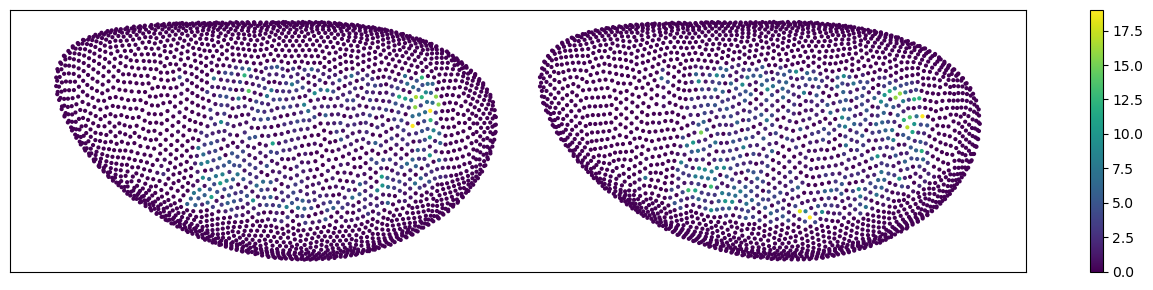

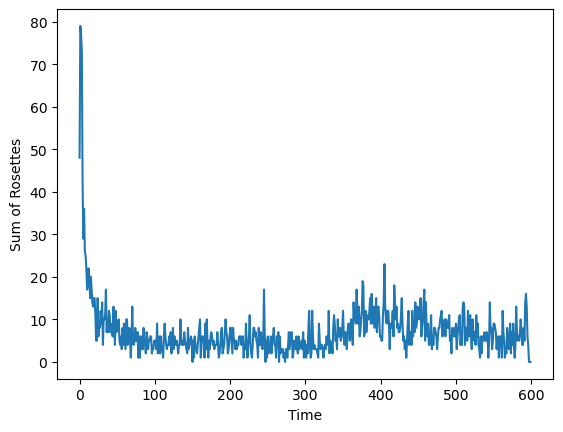

In [1]:
from aggregate_statistics import make_rosette_images, germ_band_length
import numpy as np
import matplotlib.pyplot as plt
import h5py

with h5py.File("runs/finale.hdf5", "r") as f:
    attrs = dict(f.attrs)
    poss = np.array(f["x"])
    cell_properties = np.array(f["properties"][0])
    p = np.array(f["p"])
    q = np.array(f["q"])


for scl in [5][::-1]:
    rosettes, sumcount, vecs_between = make_rosette_images(poss, cell_properties, types = [1], scale = scl)

    plt.show()
    

# print(germ_band_length(poss, cell_properties))

In [19]:
lens = [np.linalg.norm(v) for v in vecs_between]

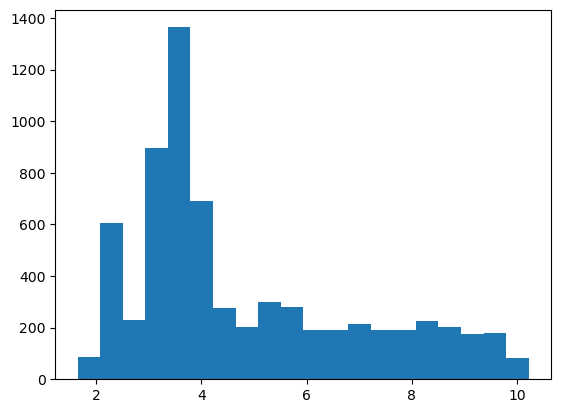

In [20]:
plt.hist(lens, bins = 20)
plt.show()

In [2]:
np.save("finale_rosettes.npy", rosettes)

(1.0, 40.0)

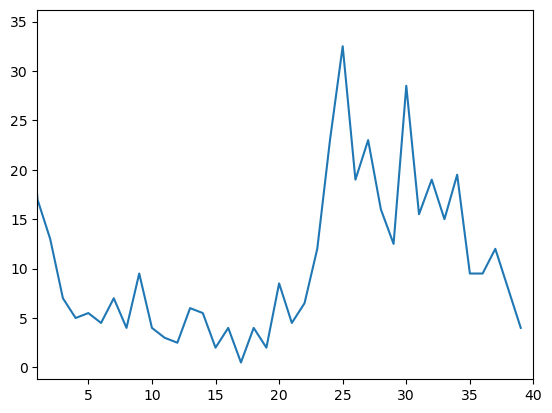

In [4]:
# 
x, y = [], []
oldx = np.array([i for i in range(len(sumcount))])
# break sumcount into 50 bins
nbins = 40
for i in range(nbins):
    x.append(i)
    mask = (oldx > i*len(oldx)/nbins) & (oldx <(i+1)*len(oldx)/nbins)
    yval = np.sum(sumcount[mask])
    y.append(yval)


plt.plot(x, np.array(y)/2)
plt.xlim(1,nbins)

    

In [37]:
toomany = rosettes.sum(axis=0) > 20

tooearly = rosettes[50:,:]

clean_r = tooearly

clean_r[:,toomany] = 0




In [13]:
# extract daniels stripe
import numpy as np
import matplotlib.pyplot as plt
import h5py


with h5py.File("runs/finale.hdf5", "r") as f:
    poss = np.array(f["x"])

dstripe = (poss[0][:,0] > 32)*(poss[0][:,0] < 45)

d_poss = poss[:2000,dstripe]

# only take every 3rd time step

oned = d_poss.reshape(-1,3)

# save as csv
np.savetxt("daniels_stripe.csv", oned, delimiter = ",")

In [14]:
oned.reshape(-1,488, 3).shape

(2000, 488, 3)

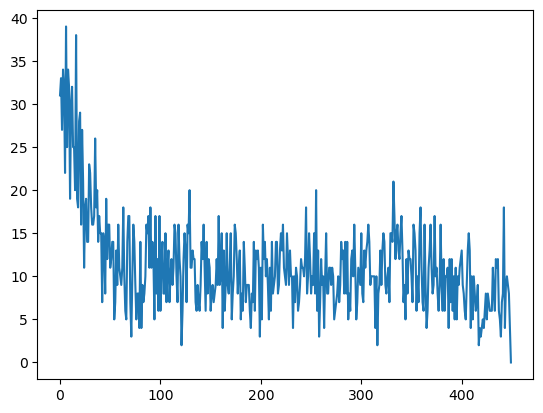

In [45]:
plt.plot(clean_r.sum(axis = 1))

In [4]:
importance = np.array(np.abs([v[1]/np.linalg.norm(v) for v in vecs_between]))

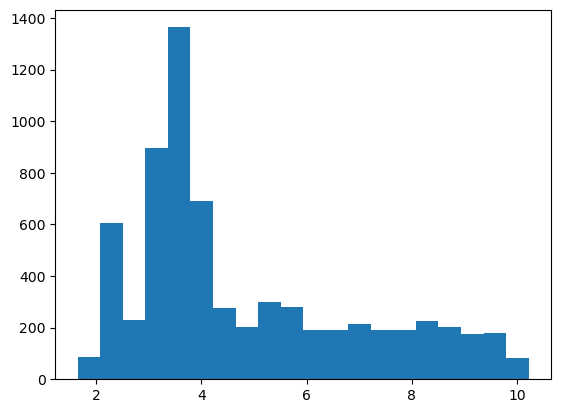

In [16]:
lens = np.array([np.linalg.norm(v) for v in vecs_between])

plt.hist(lens, bins = 20)
plt.show()

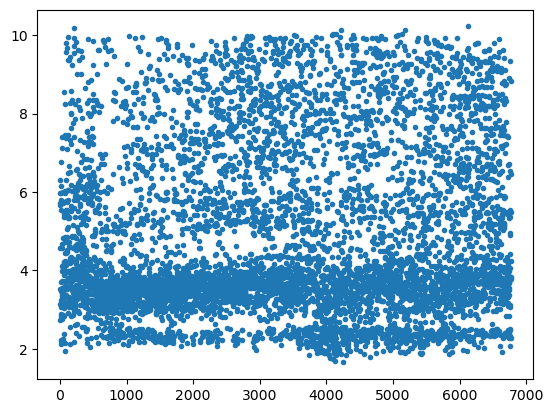

In [18]:
plt.plot(lens,'.')

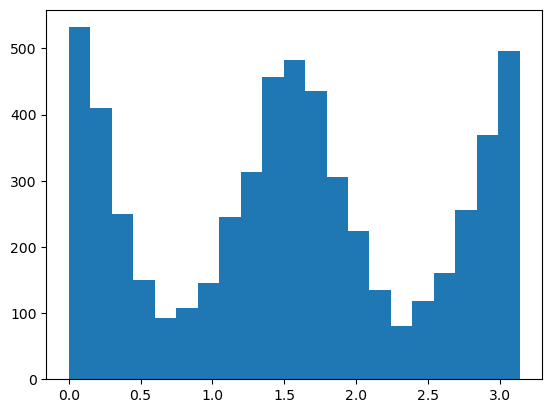

In [14]:
angles = np.abs([np.arctan2(np.abs(v[1]), (v[0])) for v in vecs_between])
angles2 = np.abs([np.arctan2(np.abs(v[2]), (v[0])) for v in vecs_between])


plt.hist(angles[(lens>3)], bins = 21,)
# plt.hist(angles2, bins = 21, alpha = 0.5)
plt.show()

In [8]:
with h5py.File("runs/gradual_l3_startx_9.hdf5", "r") as f:
    attrs = dict(f.attrs)
    poss = np.array(f["x"])
    cell_properties = np.array(f["properties"][0])
    p = np.array(f["p"])
    q = np.array(f["q"])


movement_magnitudes = np.linalg.norm(poss[-1] - poss[0], axis=1)


cell_names = ["Bulk", "Germ Band", "Invagination", "PMG1", "PMG2", "Furrows"]
colors = ["green", "red", "blue", "orange", "lightblue", "pink"]

fig, axs = plt.subplots(3, 2, figsize=(7, 9), sharex="col", sharey="row")

axs = axs.flatten()


for i, cell_type in enumerate(np.unique(cell_properties)):
    axs[i].hist(movement_magnitudes[cell_properties == cell_type], bins=20, alpha=1, label=f"Cell type {cell_type}", density=True, color=colors[i])
    # .xlabel("Movement magnitude")
    axs[i].set_title(cell_names[int(cell_type)])

fig.suptitle("Movement magnitude distribution for different cell types")

fig.tight_layout()

plt.show()

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'runs/gradual_l3_startx_9.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

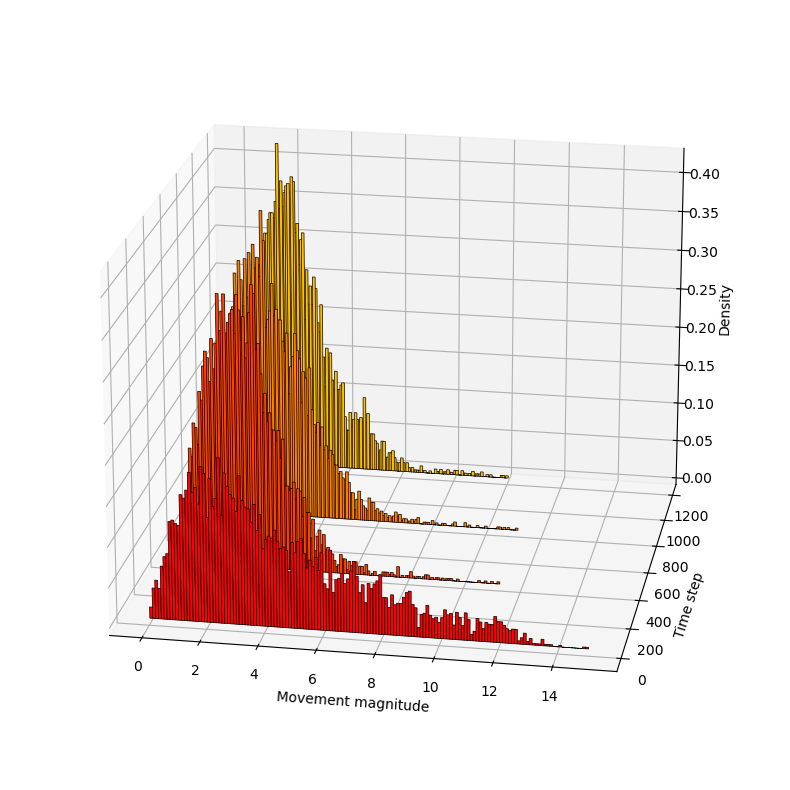

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


cell_type = 1

every = 400



for t in range(1, len(poss)-every, every):
    movement_magnitudes = np.linalg.norm(poss[t + 200] - poss[t], axis=1)

    correct_type = movement_magnitudes#[cell_properties == cell_type]

    bins, edges = np.histogram(correct_type, bins=150, density=True)

    ax.bar(edges[:-1], bins, zs=t, zdir='y', alpha=1, color=(1,t/(len(poss)-every), 0), width=0.1, edgecolor = "black", linewidth=.5)

ax.set_xlabel("Movement magnitude")
ax.set_ylabel("Time step")
ax.set_zlabel("Density")

# change the view angle
ax.view_init(elev=20, azim=-80)



1) Convince stas
2) Make 3d hist
3) Germ band length
4) make clustering on movements

